# Practical work 2

In [1]:
#Requirements
!pip install pythonds

In [2]:
from pythonds import *

## Task 1 : Decimal to hexadecimal with Stack

In [3]:
#First function
s=Stack()

def fun(decimal): #Converts decimal values to hexadecimal ones using stacks
  if decimal==0 : return "0"

  L = ["A", "B", "C", "D", "E", "F"]
  result = Stack()
  remainder = 0
  newdec = 0

  while True:
    newdec = decimal//16
    remainder = decimal%16
    if remainder ==0 and decimal<16: #we've reached the end of the loop
      break

    if remainder>9 : #above 9, we use number
      remainder = L[remainder-10]

    result.push(remainder)
    decimal = newdec

  strres = ""
  while not result.isEmpty(): #at the end of the loop, we pop out the results
    strres = strres + str(result.pop())
  return strres

In [4]:
#Test of the function
for k in range(0,64):
  print(str(k) +" : " +fun(k))

0 : 0
1 : 1
2 : 2
3 : 3
4 : 4
5 : 5
6 : 6
7 : 7
8 : 8
9 : 9
10 : A
11 : B
12 : C
13 : D
14 : E
15 : F
16 : 10
17 : 11
18 : 12
19 : 13
20 : 14
21 : 15
22 : 16
23 : 17
24 : 18
25 : 19
26 : 1A
27 : 1B
28 : 1C
29 : 1D
30 : 1E
31 : 1F
32 : 20
33 : 21
34 : 22
35 : 23
36 : 24
37 : 25
38 : 26
39 : 27
40 : 28
41 : 29
42 : 2A
43 : 2B
44 : 2C
45 : 2D
46 : 2E
47 : 2F
48 : 30
49 : 31
50 : 32
51 : 33
52 : 34
53 : 35
54 : 36
55 : 37
56 : 38
57 : 39
58 : 3A
59 : 3B
60 : 3C
61 : 3D
62 : 3E
63 : 3F


## Task 2 : Brackets match with Stacks

In [5]:
def bracketsCheck(input): #Functions that takes a string in input and uses Stacks 
    #to verifies if all brackets are complete
  firstBrackets = Stack()
  brackets = "<({[>)}]"

  for k in input:
    if k in brackets :

      if not firstBrackets.isEmpty():
        last = firstBrackets.peek() #verifies the last brackets seen before
        if match1(last, k):
          firstBrackets.pop() #if it's a match, we move on
        else:
          firstBrackets.push(k) #if it's not, we had it to the stack
      else :
        firstBrackets.push(k)
  return firstBrackets.isEmpty()



def match1(one, two): #For two brackets in input, match1 verifies whether they 
    #match or not
  brackets1 = "<({["
  brackets2 = ">)}]"
  for k in range(len(brackets1)):
    if (brackets1[k]==one and brackets2[k]==two) or (brackets2[k]==one and \
      brackets1[k]==two):
      return True
  return False

In [6]:
test_cases = [
    "(i(nput)[<>])",
    "((()))",
    "{[()]}",
    "[{(<})]",
    "{[<>]}",
    "(([]))",
    "((())]",
    "{<[()]}>",
    "([)]",
    "abc",
]

for test_case in test_cases:
    result = bracketsCheck(test_case)
    print(f"bracketsCheck('{test_case}') = {result}")

bracketsCheck('(i(nput)[<>])') = True
bracketsCheck('((()))') = True
bracketsCheck('{[()]}') = True
bracketsCheck('[{(<})]') = False
bracketsCheck('{[<>]}') = True
bracketsCheck('(([]))') = True
bracketsCheck('((())]') = False
bracketsCheck('{<[()]}>') = False
bracketsCheck('([)]') = False
bracketsCheck('abc') = True


## Task 3 : Dijkstra’s algorithm

In [7]:


#We're going to read it like :
#Graph :
#[[distance from node 1 to node 1 = 0, from 1 to 2 = 3, from 1 to 
#3 = 0 (=no links between 1 and 3), from 1 to 4 : 7],
#[from 2 to 1 = 3, from 2 to 2 = 0, from 2 to 3 = 1, from 2 to 4 =0],
#[3 to 1 =0, 3 to 2 = 1, 3 to 3 = 0, 3 to 4 = 2],
#[4 to 1 = 7, 4 to 2 = 0, 4 to 3=2,, 4 to 4 = 0]]
# so :
# [[0, 3, 0, 7],
#  [3, 0, 1, 0],
#  [0, 1, 0, 2],
#  [7, 0, 2, 0]]


#Requirements
import networkx as nx #to draw the graphs
import numpy as np

class Graph: #As defined in the comment aboce
  def __init__(self, vertex):
    self.nbVertex = vertex
    self.vertex = [[0 for column in range(vertex)] for row in range(vertex)]
    self.distanceFromSource = [np.inf for column in  range(vertex)] 
      #calculated distance from the source
    self.visited = [False for column in range(vertex)] 
      #whether a node has been visited yet or not


  def listNeightbour(self, node): #list all nodes neighbour to the one of entry
    res = []
    n=0
    for others in self.vertex[node]:
      if others!=0:
        res.append(n)
      n=n+1
    return res

  def resetVisited(self):#self-explanatory
    for u in range(self.nbVertex):
      self.visited[u]=False

  def updateDistanceTable(self, node): #update the distance from the source 
      #of all nodes neighbour to the one of entry
    for otherNodes in self.listNeightbour(node):
      if self.distanceFromSource[otherNodes]>self.distanceFromSource[node]\
        +self.vertex[node][otherNodes]:
        self.distanceFromSource[otherNodes]=self.distanceFromSource[node]\
          +self.vertex[node][otherNodes]

  def nextNodeToVisit(self): #looks for unvisited node with the smallest 
      #distance from the source. Also marks it as visited.
    minDist = np.inf
    res = None
    for nodes in range(self.nbVertex):
      if self.visited[nodes]==False and self.distanceFromSource[nodes]<minDist:
        minDist = self.distanceFromSource[nodes]
        res = nodes
    if res!=None :
      self.visited[res]=True
      return res
    return False



  def dijkstra(self, source): #the algorithm

    self.distanceFromSource[source]=0 #we start at the source
    self.visited[source]=True
    self.updateDistanceTable(source) #input all distances from the source
    nextNode = self.nextNodeToVisit() #find the next node to use 
      #(smallest distance from the source)
    while nextNode!=False: #while there are other nodes to visit
      self.updateDistanceTable(nextNode) #we update the distance 
        #from the source if we find better
      nextNode = self.nextNodeToVisit() #then look for another node to visit
    return self.distanceFromSource #returns all the distances from the source 
      #to the n^th node




#Let's test it quickly with an example :
G = Graph(9)
G.vertex = [
    [0, 5, 0, 0, 0, 0, 0, 18, 0],
    [5, 0, 4, 0, 0, 0, 0, 6, 0],
    [0, 4, 0, 12, 0, 5, 0, 0, 1],
    [0, 0, 12, 0, 7, 4, 0, 0, 0],
    [0, 0, 0, 7, 0, 10, 0, 0, 0],
    [0, 0, 5, 4, 10, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 3, 0, 11, 16],
    [18, 6, 0, 0, 0, 0, 11, 0, 2],
    [0, 0, 1, 0, 0, 0, 16, 2, 0]]

print(G.dijkstra(0))


[0, 5, 9, 18, 24, 14, 17, 11, 10]


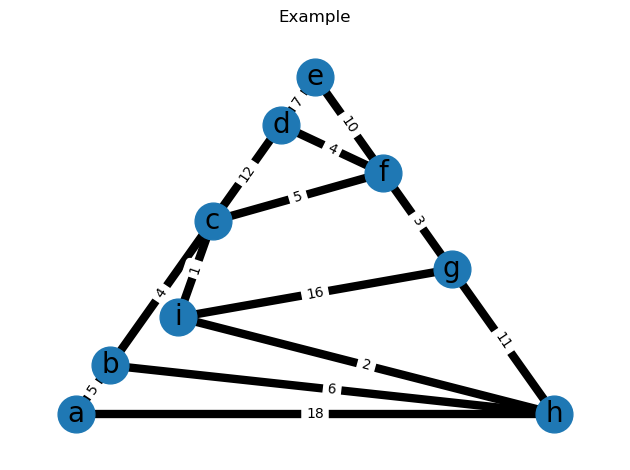

In [8]:
#plotting :
import matplotlib.pyplot as plt
import networkx as nx

def generateNodeName(nbNodes, node): #generate the name of a node 
    #based on the total nb of nodes and which node is being named
  alphabet="abcdefghijklmnopqrstuvwxyz" #it goes a,b,c,d etc if the nb 
    #of node is <=26, it goes a1, b1...a2, b2 etc if not.
  if nbNodes<=26:
    return alphabet[node]
  return alphabet[node%26]+str(node//26)

def generateGraph(graph, title):#generate a visual graph based 
    #on the format of my class Graph
  G1 = nx.Graph() #building the graph
  for i in range(graph.nbVertex):
    for j in range(graph.nbVertex):
      if graph.vertex[i][j]!=0:
        G1.add_edge(generateNodeName(graph.nbVertex, i),\
            generateNodeName(graph.nbVertex, j), weight=graph.vertex[i][j])


  pos = nx.planar_layout(G1)  # positions for all nodes, seed for reproducibility

  # nodes
  nx.draw_networkx_nodes(G1, pos, node_size=700)

  # edges
  nx.draw_networkx_edges(G1, pos, width=6)

  # node labels
  nx.draw_networkx_labels(G1, pos, font_size=20, font_family="sans-serif")
  # edge weight labels
  edge_labels = nx.get_edge_attributes(G1, "weight")
  nx.draw_networkx_edge_labels(G1, pos, edge_labels)


  ax = plt.gca()
  ax.margins(0.08)
  plt.axis("off")
  plt.title(title)
  plt.tight_layout()
  plt.show()

#using the previous example :
generateGraph(G, "Example")



Fig1 : 


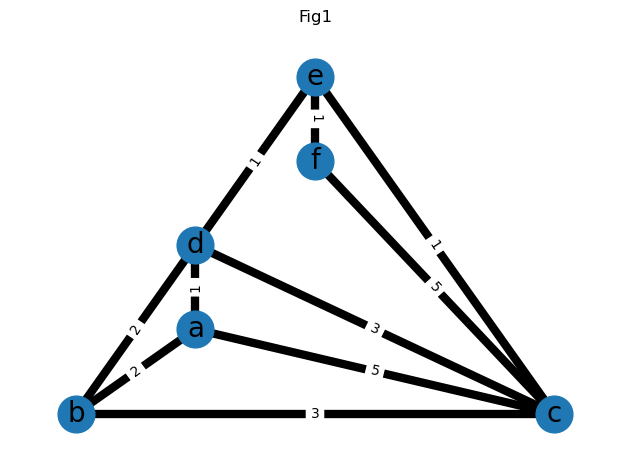


Solution : 
[0, 2, 3, 1, 2, 3]

Fig2 : 


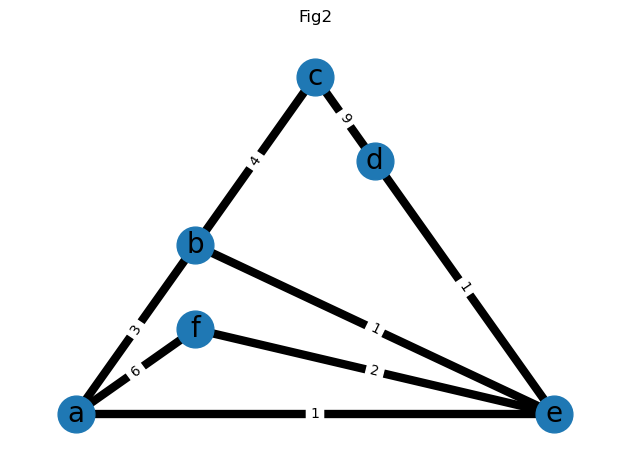


Solution : 
[0, 2, 6, 2, 1, 3]

Fig3 : 


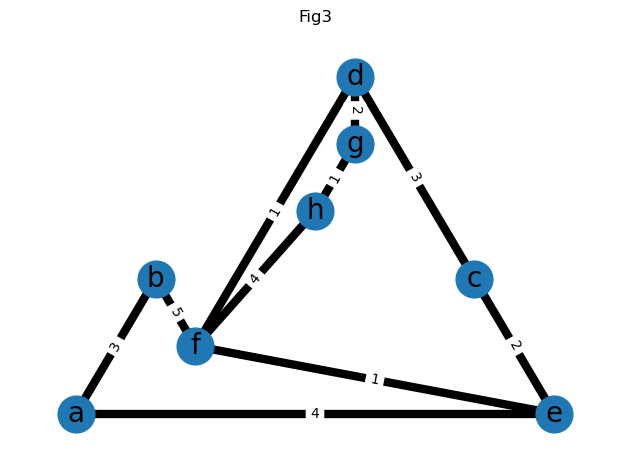


Solution : 
[0, 3, inf, inf, inf, inf, inf, inf]

Fig4 : 


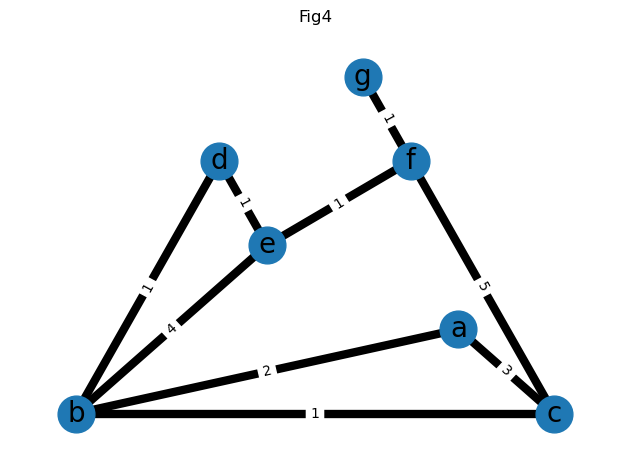


Solution : 
[0, 2, 3, 3, 4, 5, 6]

Fig5 : 


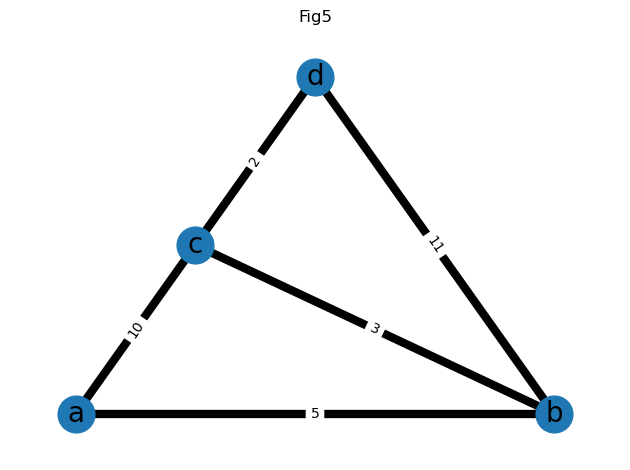


Solution : 
[0, 5, 8, 10]


In [9]:
#Now let's do it for the figure seen in class :

#Implementation :
fig1 = [[0, 2, 5, 1, 0, 0],
        [2, 0, 3, 2, 0, 0],
        [5, 3, 0, 3, 1, 5],
        [1, 2, 3, 0, 1, 0],
        [0, 0, 1, 1, 0, 1],
        [0, 0, 5, 0, 1, 0]]
G1 = Graph(len(fig1))
G1.vertex = fig1

fig2 = [[0, 3, 0, 0, 1, 6],
        [3, 0, 4, 0, 1, 0],
        [0, 4, 0, 9, 0, 0],
        [0, 0, 9, 0, 1, 0],
        [1, 1, 0, 1, 0, 2],
        [6, 0, 0, 0, 2, 0]]
G2 = Graph(len(fig2))
G2.vertex = fig2

fig3 = [[0, 3, 0, 0, 0, 0, 0, 0],
        [3, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 3, 2, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 2, 0],
        [4, 0, 0, 0, 0, 1, 0, 0],
        [0, 5, 0, 1, 0, 0, 0, 4],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 4, 0, 0]]
G3 = Graph(len(fig3))
G3.vertex = fig3

fig4 = [[0, 2, 3, 0, 0, 0, 0],
        [2, 0, 1, 1, 4, 0, 0],
        [3, 1, 0, 0, 0, 5, 0],
        [0, 1, 0, 0, 1, 0, 0],
        [0, 4, 0, 1, 0, 1, 0],
        [0, 0, 5, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 1, 0]]
G4 = Graph(len(fig4))
G4.vertex = fig4

fig5 = [[0, 5, 10, 0],
        [5, 0, 3, 11],
        [10, 3, 0, 2],
        [0, 11, 2, 0]]
G5 = Graph(len(fig5))
G5.vertex = fig5

def representation(graph, source, titre):
  print("\n"+ titre + " : ")
  generateGraph(graph, titre)
  print("\nSolution : ")
  print(graph.dijkstra(source))


representation(G1, 0, "Fig1")
representation(G2, 0, "Fig2")
representation(G3, 0, "Fig3")
representation(G4, 0, "Fig4")
representation(G5, 0, "Fig5")


## Task 4 : Prim's Algorithm

In [10]:
#NOW for Prim algorithm
import random as rd

#we'll just use the same class Graph as input
def prim(graph, source=None):

  if source==None : #in the algorithm, the start can be chosen randomly. 
      #I let the user choose as we are comparing it to Dijkstra.
    source = rd.randint(0, graph.nbVertex)
  graph.visited[source]=True
  origin = source #im not the brightest so i changed the source later

  #initialiation of variables
  table2 = [[np.inf for column in range(graph.nbVertex)] for \
            row in range(graph.nbVertex)]
  seen = []
  mini = np.inf
  n = None

  #finiding the next node
  for node in range(graph.nbVertex):
    table2[source][node] = graph.vertex[source][node]
    if graph.vertex[source][node]<mini and  graph.vertex[source][node]!=0:
      mini = graph.vertex[source][node]
      n = node

  #first path taken
  seen.append([source, n, mini])
  nextNode = n
  graph.visited[n] = True

  #filling in the table of reference of what's left to explore
  for u in range(graph.nbVertex):
        table2[nextNode][u] = graph.vertex[nextNode][u]

  while nextNode !=None:

    mini = np.inf
    nextNode = None

    for i in range(graph.nbVertex):
      for j in range(graph.nbVertex):

        if graph.visited[i] and graph.visited[j] and table2[i][j]!=np.inf:
          table2[i][j] = np.inf
        if table2[i][j]!=np.inf and table2[i][j]!=0 and table2[i][j]<mini:

          if not graph.visited[j] :
            source = i
            nextNode = j
            mini = table2[i][j]
            break
    if nextNode!=None :
      seen.append([source, nextNode, mini])
      graph.visited[nextNode] = True
      for u in range(graph.nbVertex):
        table2[nextNode][u] = graph.vertex[nextNode][u]

  #print(seen) #seen is the output : it's a list of the path taken 
    #in the form of [from node1, to node2, distance node1<->node2]

  #now that we have the "shortest" tree we want to calculate 
    #all distance from the source to the n^th node
  #so as to format the answer in the same way as Dijkstra's algorithm :

  res = [0 for i in range (graph.nbVertex)] #0 the distance, false whether 
    #the node as been fully linked to the origin or not yet
  node = 0
  for step in seen:
    res[step[1]]=res[step[1]]+step[2]+res[step[0]]
    node = node +1

  for node in range(graph.nbVertex):
    if res[node]==0 and node!=origin:
      res[node]=np.inf #removing the values that can't be reached
  #print(res)
  return res



#first test
G = Graph(9)
G.vertex = [
    [0, 5, 0, 0, 0, 0, 0, 18, 0],
    [5, 0, 4, 0, 0, 0, 0, 6, 0],
    [0, 4, 0, 12, 0, 5, 0, 0, 1],
    [0, 0, 12, 0, 7, 4, 0, 0, 0],
    [0, 0, 0, 7, 0, 10, 0, 0, 0],
    [0, 0, 5, 4, 10, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 3, 0, 11, 16],
    [18, 6, 0, 0, 0, 0, 11, 0, 2],
    [0, 0, 1, 0, 0, 0, 16, 2, 0]]
prim(G,0)

[0, 5, 9, 18, 25, 14, 17, 12, 10]

In [11]:
#Now with the 5 graph we've seen :

G1.resetVisited()
print(prim(G1,0))

G2.resetVisited()
print(prim(G2,0))

G3.resetVisited()
print(prim(G3,0))

G4.resetVisited()
print(prim(G4,0))

G5.resetVisited()
print(prim(G5,0))

[0, 2, 3, 1, 2, 3]
[0, 2, 6, 2, 1, 3]
[0, 3, inf, inf, inf, inf, inf, inf]
[0, 2, 3, 3, 4, 5, 6]
[0, 5, 8, 10]


### Comparison of Prim's and Djikstra's algorithm

In [17]:
#We will now compare Dijkstra's algorithm and Prim alorithm :
import timeit

#Based on their results :
def bestDistance(graphList):
  resDji = 0
  resPri = 0

  for graph in graphList :
    graph.resetVisited()
    resDji = resDji+sum(graph.dijkstra(0))
    graph.resetVisited()
    resPri = resPri+sum(prim(graph,0))
  return "Dijkstra total weight : "+str(resDji)\
    +" - Prim total weight: "+str(resPri)

#Based on their time :
def bestTime(graphList):
    for graph in graphList:
        graph.resetVisited()

    dij_time = timeit.timeit(lambda: [graph.dijkstra(0) for graph in graphList], number=1)

    for graph in graphList:
        graph.resetVisited()

    pri_time = timeit.timeit(lambda: [prim(graph, 0) for graph in graphList], number=1)

    return f"Dijkstra total time: {dij_time:.6f} seconds - Prim total time: {pri_time:.6f} seconds"



graphList = [G1, G2, G4, G5] #removed G3 bc starting at 0 raise 
#infinity and I dont want to make longer functions to handle it
print(bestDistance(graphList))
print(bestTime(graphList))

#When we run, we can see that both Djikstra and Prim have the
#same weight in distance, but Djikstra is slightly faster than Prim

Dijkstra total weight : 71 - Prim total weight: 71
Dijkstra total time: 0.000077 seconds - Prim total time: 0.000372 seconds


When we run, we can see that both Djikstra and Prim have the same weight in distance, but Djikstra is slightly faster than Prim